## Idea

Make an explorable website that leads the viewer through a surgery

1. Introduction: The Surgical Experience

Begin by introducing readers to the journey of a surgical patient. An interactive flowchart can depict stages such as admission, preoperative assessments, anesthesia, surgery, recovery, and discharge. Users can click on each stage to explore detailed information, statistics, and common practices.

2. Patient Demographics and Risk Factors

Utilize interactive data visualizations to showcase how factors like age, BMI, and preexisting conditions (e.g., hypertension, diabetes) influence surgical outcomes. For example, an interactive scatter plot can allow users to select specific demographics and view associated complication rates or recovery times.

3. Inside the Operating Room: Procedures and Techniques

Create an interactive diagram of an operating room where users can click on different surgical approaches, positions, and anesthesia types to learn about their purposes and implications. Incorporate multimedia elements, such as short videos or animations, to demonstrate procedures or equipment in action.

4. Case Studies: Outcomes and Complications

Present anonymized case studies with interactive timelines highlighting key events from anesthesia induction to discharge. Users can explore how variations in intraoperative factors (e.g., blood loss, fluid management) and patient characteristics impact outcomes like length of hospital stay or ICU admission.

5. Interactive Simulations: Decision-Making Scenarios

Develop simulations where users can make clinical decisions based on patient data and see potential outcomes. For instance, choosing fluid management strategies during surgery and observing how these choices affect postoperative recovery.

6. Data Explorer: Trends and Patterns

Provide an interactive dashboard that allows readers to explore the dataset themselves. They can filter data by surgical department, operation type, or patient demographics to identify trends, such as which surgeries have higher complication rates or longer recovery periods.

7. Conclusion: Insights and Future Directions

Summarize key findings and encourage readers to reflect on how data analysis can improve surgical practices and patient outcomes. Offer insights into ongoing research or advancements in surgical techniques and patient care.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import re

In [3]:
cases = pd.read_csv('cases.txt')
cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [4]:
cases['dx'].unique()

array(['Rectal cancer', 'Advanced gastric cancer ', 'Gallbladder stone',
       ..., 'Pulmonary sclerosing hemangioma ',
       'Venous insufficiency with swelling or pain',
       'Colon submucosal tumor, unknown behavior'], dtype=object)

In [5]:
demographic_dx = cases[['age', 'sex', 'height', 'weight', 'bmi', 'dx']]

In [6]:
demographic_dx.to_csv('demographic_dx.csv', index=False)

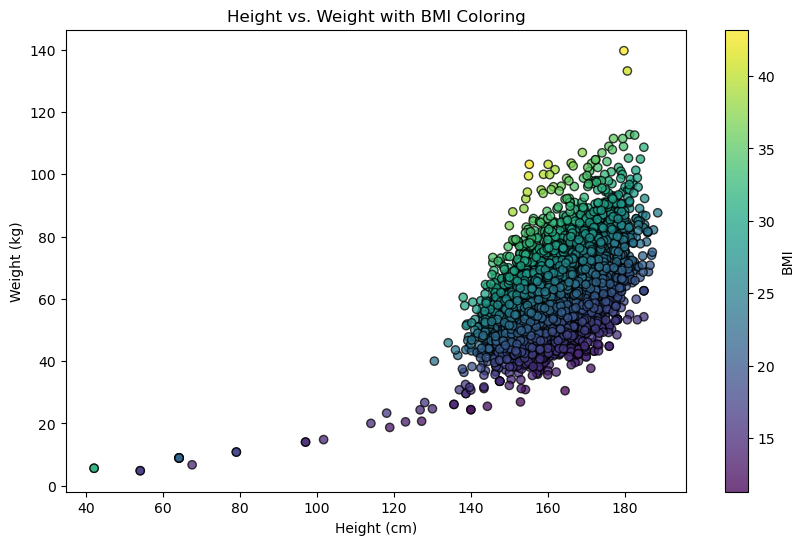

In [7]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    demographic_dx["height"], 
    demographic_dx["weight"], 
    c=demographic_dx["bmi"], 
    cmap="viridis", 
    edgecolors="k", 
    alpha=0.75
)

cbar = plt.colorbar(scatter)
cbar.set_label("BMI")

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight with BMI Coloring")

plt.show()

In [8]:
cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [9]:
cancer = cases[cases['dx'].str.contains('cancer')]

In [10]:
cancer = cancer[['age', 'sex', 'height', 'weight', 'bmi', 'dx']]

In [11]:
cancer

,age,sex,height,weight,bmi,dx
0,77.0,M,160.2,67.50,26.3,Rectal cancer
1,54.0,M,167.3,54.80,19.6,Advanced gastric cancer
3,74.0,M,160.6,53.00,20.5,Advanced gastric cancer
9,72.0,M,162.5,62.75,23.8,Early gastric cancer
18,74.0,M,171.3,66.20,22.6,Common bile duct cancer
...,...,...,...,...,...,...
6365,70.0,F,152.8,63.50,27.2,Lung cancer right
6367,72.0,M,153.1,49.80,21.2,Common bile duct cancer
6383,64.0,M,161.5,63.00,24.2,Advanced gastric cancer
6385,61.0,F,151.7,43.25,18.8,Early gastric cancer


In [12]:
def classify_cancer(cancer_string):
    """
    Groups cancer-related strings into broader cancer types.
    
    Args:
    - cancer_string (str): A description of the cancer type.
    
    Returns:
    - str: The categorized cancer type.
    """
    if pd.isna(cancer_string):
        return "unknown cancer type"
    
    cancer_string = cancer_string.lower()

    cancer_map = {
        "breast cancer": ["breast"],
        "lung cancer": ["lung", "nsclc", "sclc"],
        "colorectal cancer": ["colorectal", "colon", "rectal"],
        "prostate cancer": ["prostate"],
        "gastric cancer": ["gastric", "stomach"],
        "pancreatic cancer": ["pancreatic", "pancreas"],
        "liver cancer": ["liver", "hepatocellular", "hcc"],
        "ovarian cancer": ["ovarian", "ovary"],
        "cervical cancer": ["cervical", "cervix"],
        "esophageal cancer": ["esophageal", "esophagus"],
        "bladder cancer": ["bladder"],
        "leukemia": ["leukemia", "aml", "cml", "all", "cll"],
        "lymphoma": ["lymphoma", "hodgkin", "non-hodgkin", "nhl"],
        "melanoma": ["melanoma", "skin"],
        "brain cancer": ["glioblastoma", "brain", "astrocytoma"],
        "thyroid cancer": ["thyroid"],
        "sarcoma": ["sarcoma"],
        "multiple myeloma": ["myeloma", "multiple myeloma"]
    }

    for cancer_type, keywords in cancer_map.items():
        if any(re.search(rf"\b{kw}\b", cancer_string) for kw in keywords):
            return cancer_type
    
    return "unknown cancer type"  # Default if no match

In [13]:
cancer['group_dx'] = cancer['dx'].apply(classify_cancer)

In [14]:
cancer_group_counts = cancer['group_dx'].value_counts()

In [15]:
cancer_group_counts

group_dx
colorectal cancer      848
gastric cancer         611
lung cancer            353
breast cancer          188
unknown cancer type    163
pancreatic cancer       81
prostate cancer         58
esophageal cancer       34
cervical cancer         32
ovarian cancer          29
liver cancer            22
bladder cancer          19
thyroid cancer           5
Name: count, dtype: int64

In [16]:
cancer.drop('dx', axis=1, inplace=True)

In [17]:
(cancer_group_counts.iloc[0] + cancer_group_counts.iloc[1] + cancer_group_counts.iloc[2]) / cancer_group_counts.sum()


np.float64(0.7417110110519852)

In [18]:
cases.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [19]:
demographic_dx['sex'].unique()

array(['M', 'F'], dtype=object)

In [20]:
demographic_dx['sex'] = demographic_dx['sex'].apply(lambda x: 1 if x == 'F' else 0)

C:\Users\lamet\AppData\Local\Temp\ipykernel_13752\1239009183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_dx['sex'] = demographic_dx['sex'].apply(lambda x: 1 if x == 'F' else 0)


In [21]:
demographic_dx.to_csv('demographic_dx.csv', index=False)

In [22]:
demographic_dx['age'].describe()

count    6388.000000
mean       57.296493
std        14.976461
min         0.300000
25%        48.000000
50%        59.000000
75%        68.000000
max        94.000000
Name: age, dtype: float64

In [23]:
cases['dx'].value_counts().index.tolist()

['Early gastric cancer',
 'Colon cancer, sigmoid',
 'Rectal cancer',
 'Lung cancer right',
 'Hepatocellular carcinoma',
 'Advanced gastric cancer',
 'Gallbladder stone without obstruction',
 'Thyroid nodule',
 'End stage renal disease',
 'Early gastric cancer ',
 'Lung cancer left',
 'Rectal cancer ',
 'Colon cancer, rectosigmoid',
 'Colon cancer, ascending',
 'Infiltrating ductal carcinoma of breast right',
 'Hepatocellular carcinoma ',
 'Abnormal chest CT, lung nodule',
 'Breast cancer right',
 'Varicose vein of lower limb',
 'Colon cancer',
 'Living liver donor',
 'Thyroid nodule ',
 'Infiltrating ductal carcinoma of breast left',
 'Inguinal hernia not specified as recurrent',
 'Breast cancer left',
 'Abnormal chest CT, lung',
 'Gallbladder polyp',
 'Advanced gastric cancer ',
 'Pancreatic cancer',
 'Breast cancer unspecified side',
 'Acute cholecystitis',
 'Solitary pulmonary nodule',
 'Symptomatic gallbladder stone without obstruction',
 'Myoma uteri',
 'Ovarian cyst',
 'Gallbladd

In [24]:
def categorize_diagnoses(df, dx_column='dx'):
    """
    Categorizes diagnoses into 10 broader categories based on the provided 'dx' column.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the diagnoses.
        dx_column (str): The name of the column containing the diagnoses. Default is 'dx'.
    
    Returns:
        pd.DataFrame: The DataFrame with an additional column 'category' containing the grouped categories.
    """
    
    # Define the mapping of diagnoses to categories
    category_mapping = {
        'Gastrointestinal (GI) Cancers': [
            'gastric', 'colon cancer', 'rectal cancer', 'hepatocellular carcinoma', 
            'pancreatic cancer', 'cholangiocarcinoma', 'gastrointestinal stromal tumor', 
            'esophageal cancer', 'colorectal cancer', 'anal cancer', 'duodenal cancer', 
            'jejunal cancer', 'ileocecal cancer', 'gastric outlet obstruction'
        ],
        'Breast and Gynecological Cancers': [
            'breast', 'ovarian cancer', 'cervical cancer', 'endometrial cancer', 
            'myoma uteri', 'ductal carcinoma', 'lobular carcinoma', 'gynecological cancer'
        ],
        'Thoracic and Lung Diseases': [
            'lung cancer', 'pneumothorax', 'mediastinal mass', 'pulmonary fibrosis', 
            'bronchiectasis', 'empyema', 'solitary pulmonary nodule', 'lung abscess'
        ],
        'Hepatobiliary and Pancreatic Diseases': [
            'gallbladder stone', 'gallbladder polyp', 'cholecystitis', 'choledochal cyst', 
            'pancreatic cyst', 'liver cirrhosis', 'hepatitis', 'pancreatitis', 
            'biliary stricture', 'gallbladder cancer'
        ],
        'Urological and Renal Diseases': [
            'prostate cancer', 'bladder cancer', 'renal cell carcinoma', 'hydronephrosis', 
            'kidney donor', 'ureteral cancer', 'vesicoureteral reflux', 'renal'
        ],
        'Endocrine and Thyroid Disorders': [
            'thyroid nodule', 'hyperparathyroidism', 'adrenal incidentaloma', 'diabetes', 
            'pheochromocytoma', 'cushing syndrome', 'thyroid cancer'
        ],
        'Hernias and Abdominal Wall Disorders': [
            'inguinal hernia', 'incisional hernia', 'umbilical hernia', 'ventral hernia', 
            'parastomal hernia', 'adhesive ileus', 'abdominal wall mass'
        ],
        'Benign Tumors and Non-Cancerous Growths': [
            'thyroid nodule (benign)', 'lipoma', 'ovarian cyst', 'colonic polyp', 
            'fibroadenoma', 'hamartoma', 'benign neoplasm'
        ],
        'Infectious and Inflammatory Conditions': [
            'appendicitis', 'diverticulitis', 'peritonitis', 'tuberculosis', 
            'abscess', 'cholecystitis', 'crohn’s disease', 'inflammatory bowel disease'
        ],
        'Vascular and Miscellaneous Conditions': [
            'varicose vein', 'aortic aneurysm', 'deep vein thrombosis', 'hemorrhoids', 
            'anal fistula', 'trauma', 'vascular disease', 'postoperative complications'
        ],
        'Abnormality Physiology/Anatomy CT': [
            'abnormality', 'anatomy', 'ct'
        ],
        'Other Disease/Cancer': [
            'cancer', 'disease'
        ]
    }

    # Function to map a diagnosis to its category
    def map_diagnosis_to_category(diagnosis):
        diagnosis_lower = diagnosis.lower()
        for category, keywords in category_mapping.items():
            for keyword in keywords:
                if keyword in diagnosis_lower:
                    return category
        return 'Other'  # For diagnoses that don't fit into any category

    # Apply the mapping to the 'dx' column
    df['category'] = df[dx_column].apply(map_diagnosis_to_category)
    
    return df

In [25]:
cases['dx_group'] = categorize_diagnoses(cases)['category']

In [26]:
cases['dx_group'].value_counts().to_csv('dx_group_counts.csv')

In [27]:
cases[cases['dx_group'] == 'Other']['dx'].tolist()

['Gross hematuria ',
 'Femoral hernia',
 'Aneurysm, abdominal aorta',
 'Papillary thyroid carcinoma',
 'Cholangitis',
 'Adenocarcinoma of lung left',
 'Invasive thymoma ',
 'Living liver donor',
 'Disorder of kidney and ureter',
 'Enterocutaneous fistula ',
 'Mucinous cystic neoplasm of pancreas, borderline',
 'Pelvic organ prolapse',
 'Malignant neoplasm of chest wall',
 'Squamous cell carcinoma of lung left',
 'Neuroendocrine carcinoma ',
 'Neurogenic tumor ',
 'Undifferentiated pleomorphic sarcoma of pelvis ',
 'Open wound of chest wall ',
 'Ground-glass opacity',
 "Takayasu's arteritis ",
 'Papillary thyroid adenoma',
 'Antenatal care for other high risk pregnancy',
 'Postpartum follow up',
 'Liposarcoma of retroperitoneum ',
 'Pseudomyxoma peritonei',
 'Idiopathic thrombocytopenic purpura',
 'Squamous cell carcinoma of lung left',
 'Incompetent internal os of cervix in pregnancy',
 'Congenital cystic adenomatoid malformation of lung',
 'Adenomyomatosis of gallbladder',
 'Ileostomy